In [1]:
import os
import sys
import lammps_logfile
import numpy as numpy
from numpy import ndarray
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot
from typing import List

base_dir: str = os.getcwd()
os.environ['LAMMPS_PYTHON_BASE_PATH'] =  os.path.join(base_dir, '../../../../md-analysis-tutorial/python/src')
sys.path.append(os.getenv('LAMMPS_PYTHON_BASE_PATH'))

from modules.line_graph import LineGraph

# Extract time and CNT length data from `output_cnt_length.dat` file and convert time from femtoseconds to picoseconds

In [2]:
# File contains columns of data, the .T transpose operation switches them to rows, making it easier to
# unpack into separate variables
time, cnt_length = numpy.loadtxt(
    os.path.join(base_dir, '../data/raw/length-vs-time/output_cnt_length.dat')
).T

# Convert time from femtoseconds to picoseconds
time /= 1000

# Combine time, and CNT length into ndarray
atom_population_vs_time_data_array: List[ndarray] = [
    numpy.vstack((time, cnt_length)),
]

# Create Matplotlib graph to plot CNT length vs time for CNT with unbreakable bonds

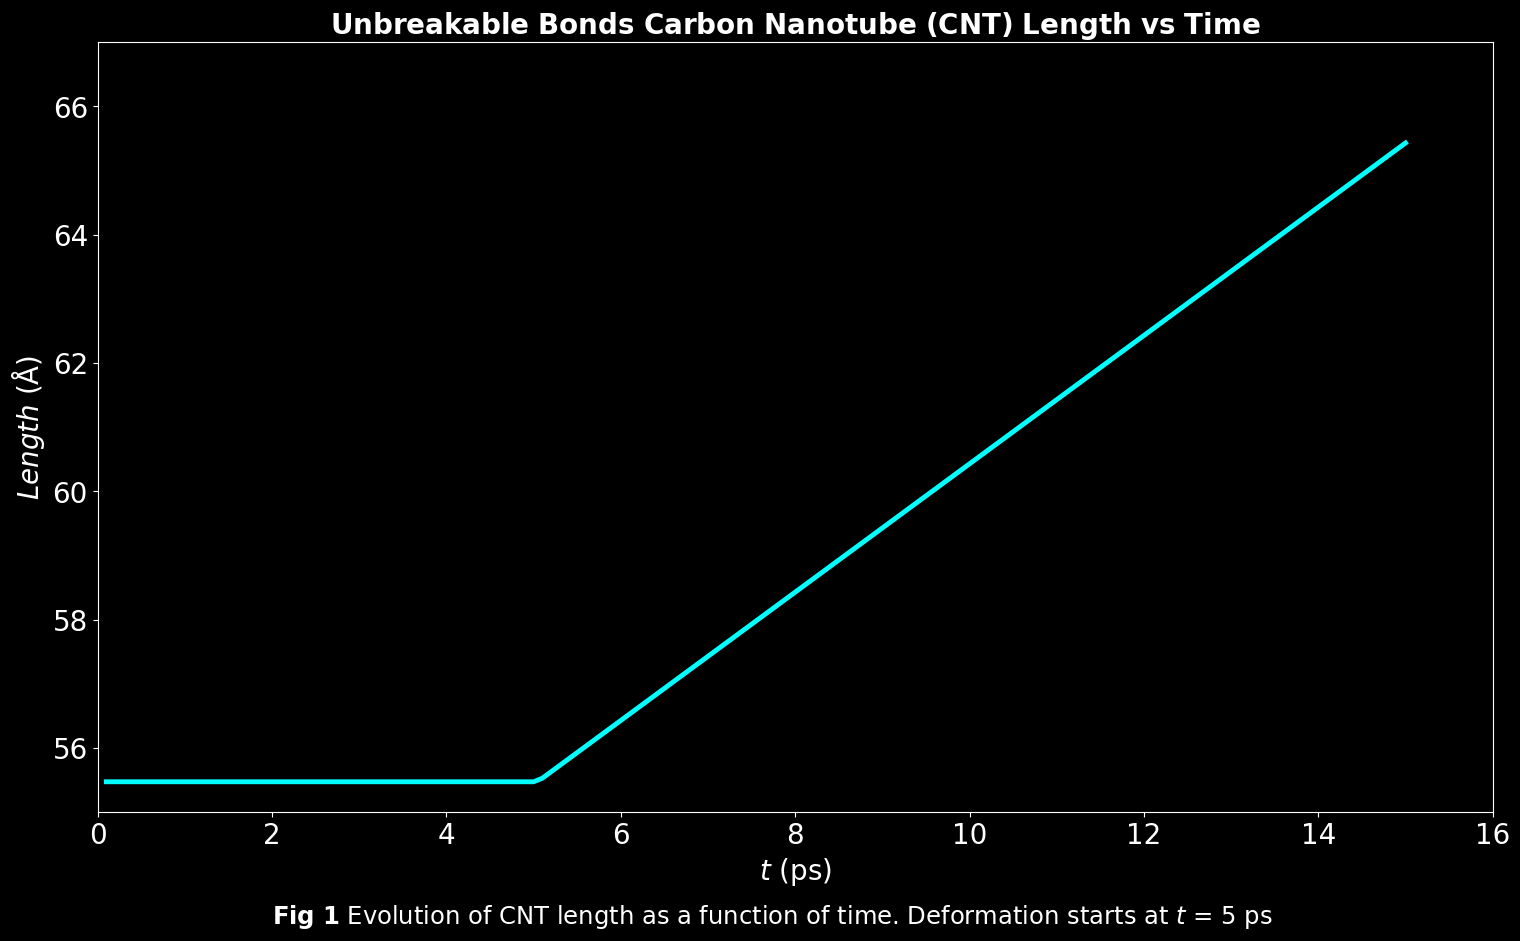

In [3]:
# Create 'CNT length vs time' line graph
LineGraph.single_line_graph(
    data_arrays=atom_population_vs_time_data_array,
    figure_size=(18, 10),
    line_colours=['cyan'],
    x_label=r'$t$ (ps)',
    y_label=r'$Length$ (Å)',
    x_lim=(0, 16),
    y_lim=(55, 67),
    graph_title=r'$\bf{Unbreakable\ Bonds\ Carbon\ Nanotube\ (CNT)\ Length\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 1}$ Evolution of CNT length as a function of time. Deformation starts at $t$ = 5 ps',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=0.005,
    font_size=20,
    tick_label_size=20,
    line_width=3.5,
    save_path=os.path.join(base_dir, '../reports/figures/graphs/cnt_length_vs_time.png')
)

# Extract time and total energy data for first & second simulation run from log file and convert time from femtoseconds to picoseconds

In [4]:
# Extract first-input-log.lammps log file data & instantiate lammps_logfile.File object
log_file: lammps_logfile.File = lammps_logfile.File(
    os.path.join(base_dir, '../logs/cnt-unbreakable-bonds-log.lammps')
)

total_energy_vs_time_array: List[ndarray] = []

# Extract first run time from lammps_logfile.File object and convert from fs to ps
time_first_run: ndarray = log_file.get('Step', run_num=0) / 1000

# Extract first run total energy from lammps_logfile.File object
total_energy_first_run: ndarray = log_file.get('TotEng', run_num=0)

total_energy_vs_time_array.append(numpy.vstack((time_first_run, total_energy_first_run)))

# Extract second run time from lammps_logfile.File object and convert from fs to ps
time_second_run: ndarray = log_file.get('Step', run_num=1) / 1000

# Extract second run total energy from lammps_logfile.File object
total_energy_second_run: ndarray = log_file.get('TotEng', run_num=1)

total_energy_vs_time_array.append(numpy.vstack((time_second_run, total_energy_second_run)))

# Create Matplotlib graph to plot CNT system total energy vs time for CNT with unbreakable bonds

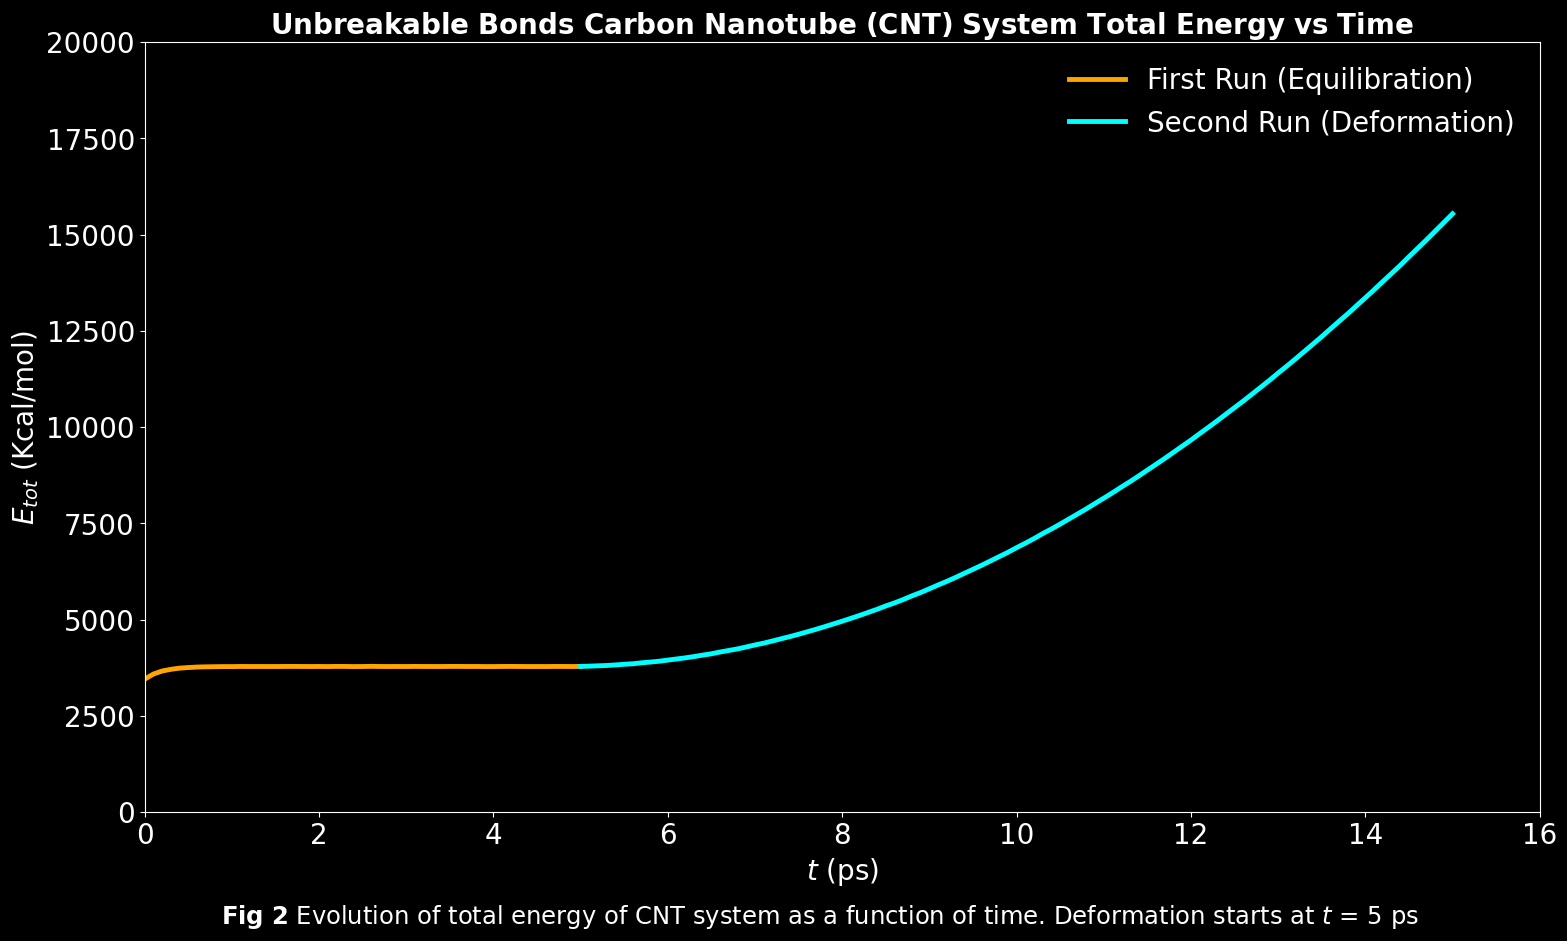

In [5]:
# Create 'CNT system total energy vs time' line graph
LineGraph.single_line_graph(
    data_arrays=total_energy_vs_time_array,
    figure_size=(18, 10),
    line_labels=['First Run (Equilibration)', 'Second Run (Deformation)'],
    line_colours=['orange', 'cyan'],
    x_label=r'$t$ (ps)',
    y_label=r'$E_{tot}$ (Kcal/mol)',
    y_lim=(0, 20000),
    x_lim=(0, 16),
    graph_title=r'$\bf{Unbreakable\ Bonds\ Carbon\ Nanotube\ (CNT)\ System\ Total\ Energy\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 2}$ Evolution of total energy of CNT system as a function of time. '
                r'Deformation starts at $t$ = 5 ps',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=0.005,
    font_size=20,
    tick_label_size=20,
    line_width=3.5,
    save_path=os.path.join(base_dir, '../reports/figures/graphs/cnt_total_energy_vs_time.png')
)